# **Project**

# **Laptop Price Prediction for SmartTech Co.**

**CRISP-ML(Q) Based Workflow**


# **Step 1: Business  Understanding**
## ------------------------------------------------------
**Objective**: Predict laptop prices based on specifications like brand, RAM, processor, GPU, screen size, and storage.

**Importance**: Helps SmartTech Co. determine competitive pricing and understand key features influencing cost.

**Target Variable**: Price

**Type of ML Problem**: Regression

**Goals**:
- Build a price prediction model
- Understand price influencers like brand, SSD, processor
- Evaluate brand and spec contributions to pricing


# **Step 2: Data Understanding**

In [35]:
import pandas as pd
import numpy as np

# Importing essential libraries for data handling, visualization, and model building.

In [36]:
df = pd.read_csv(r"/content/laptop.csv")
df

# Loading the dataset into a pandas DataFrame for further analysis.

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [37]:
# Drop unnecessary columns if present
df.drop(columns=[col for col in ['Unnamed: 0', 'Unnamed: 0.1'] if col in df.columns], inplace=True)

In [38]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [39]:
import numpy as np

# Replace "?" with np.nan
df = df.replace('?', np.nan)

# The dataset may use "?" to indicate missing or unknown values.
# This line replaces all such "?" entries with np.nan so that they can be properly handled (e.g., dropped or imputed) in later step

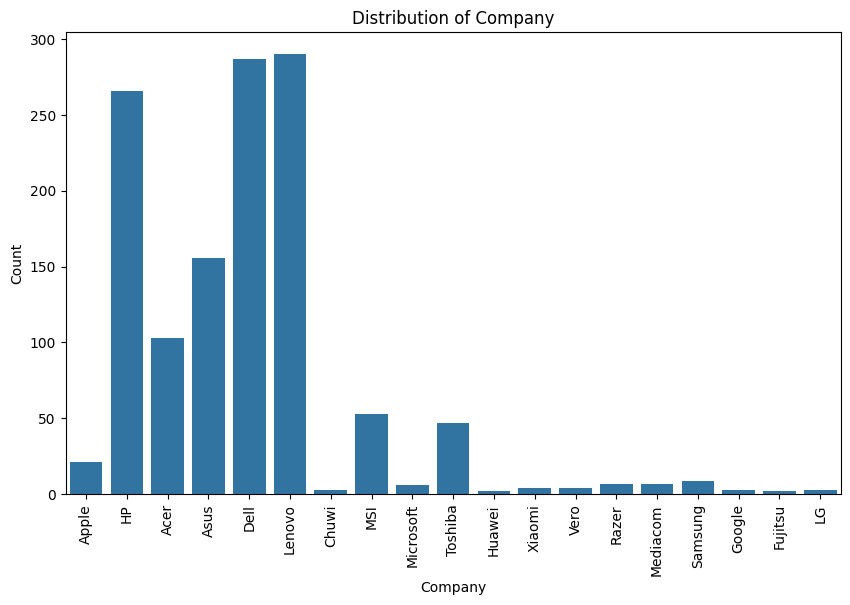

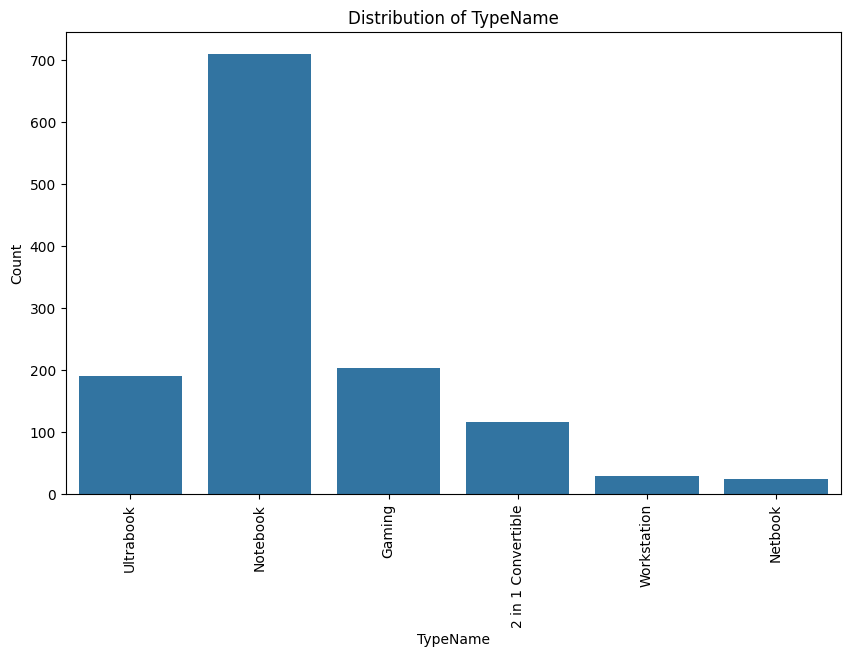

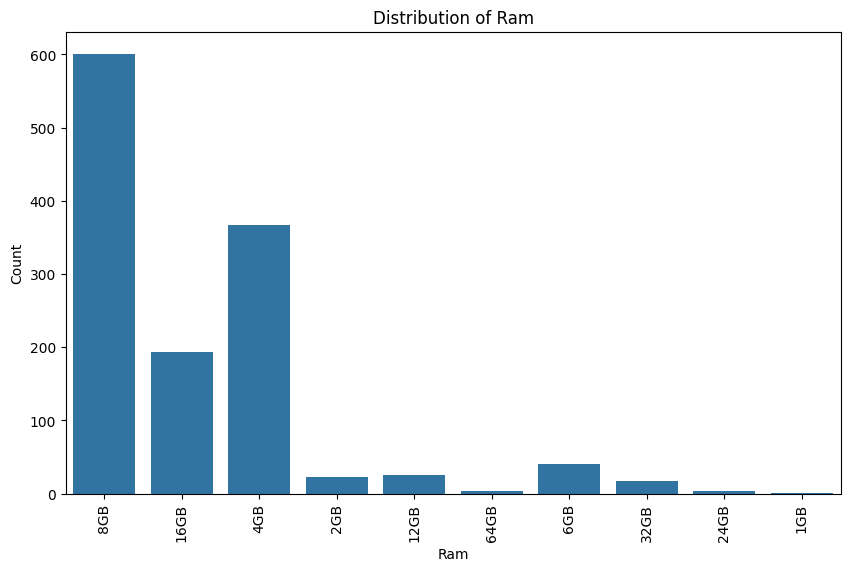

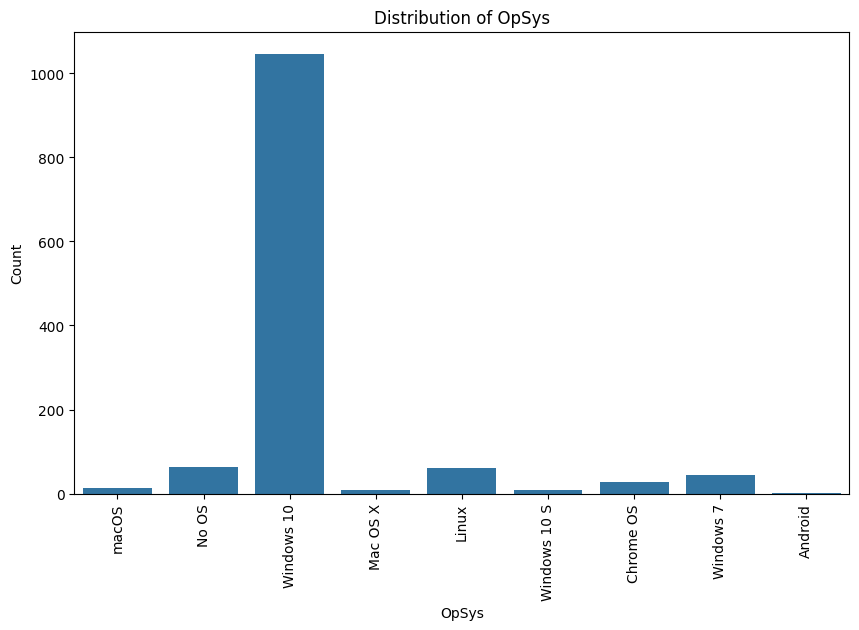

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of categorical variables
categorical_cols = ['Company', 'TypeName','Ram','OpSys']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()

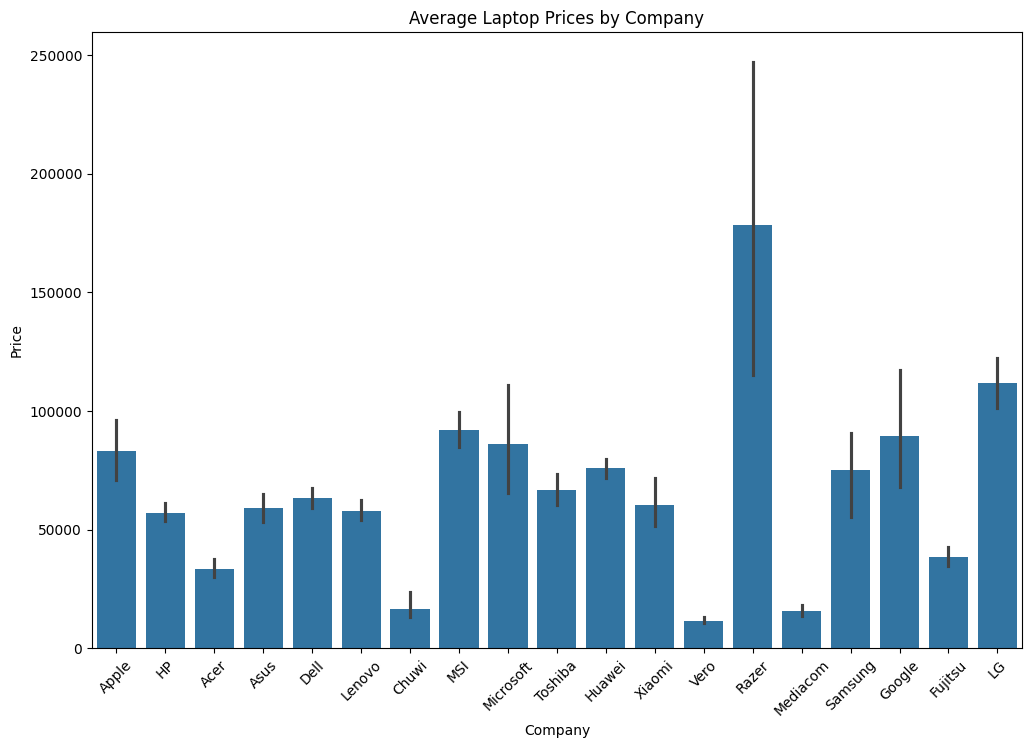

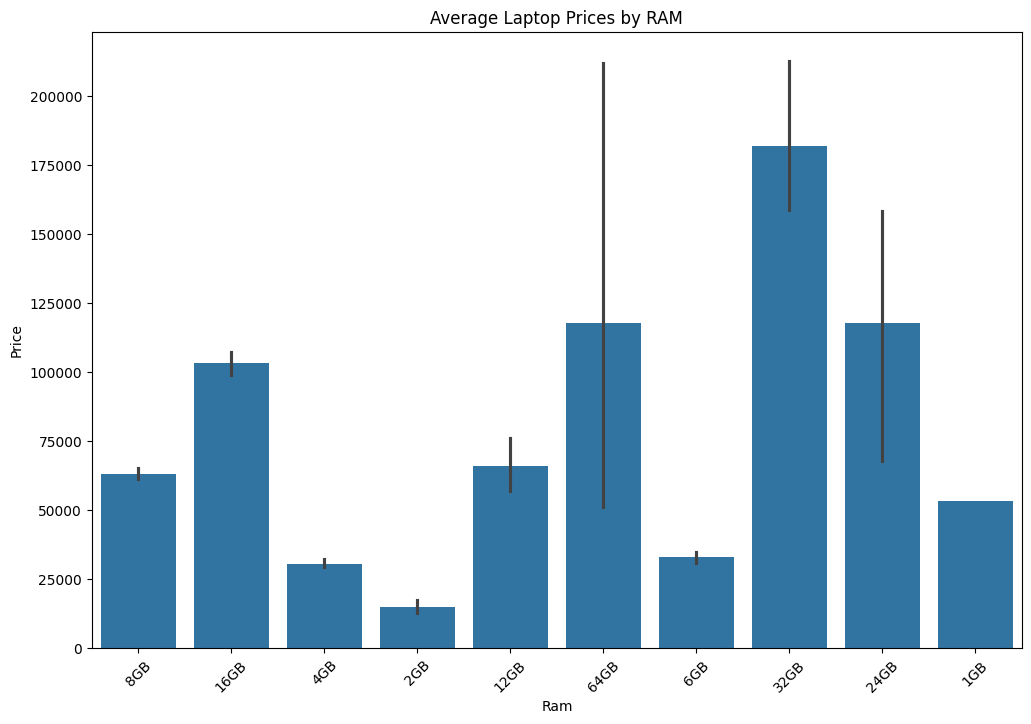

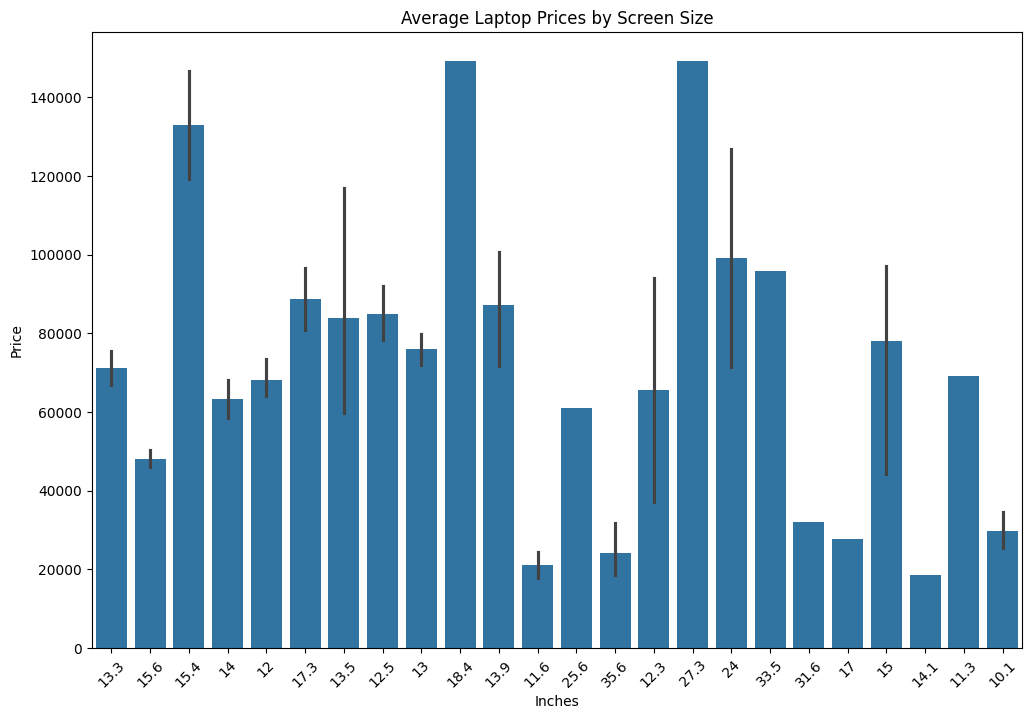

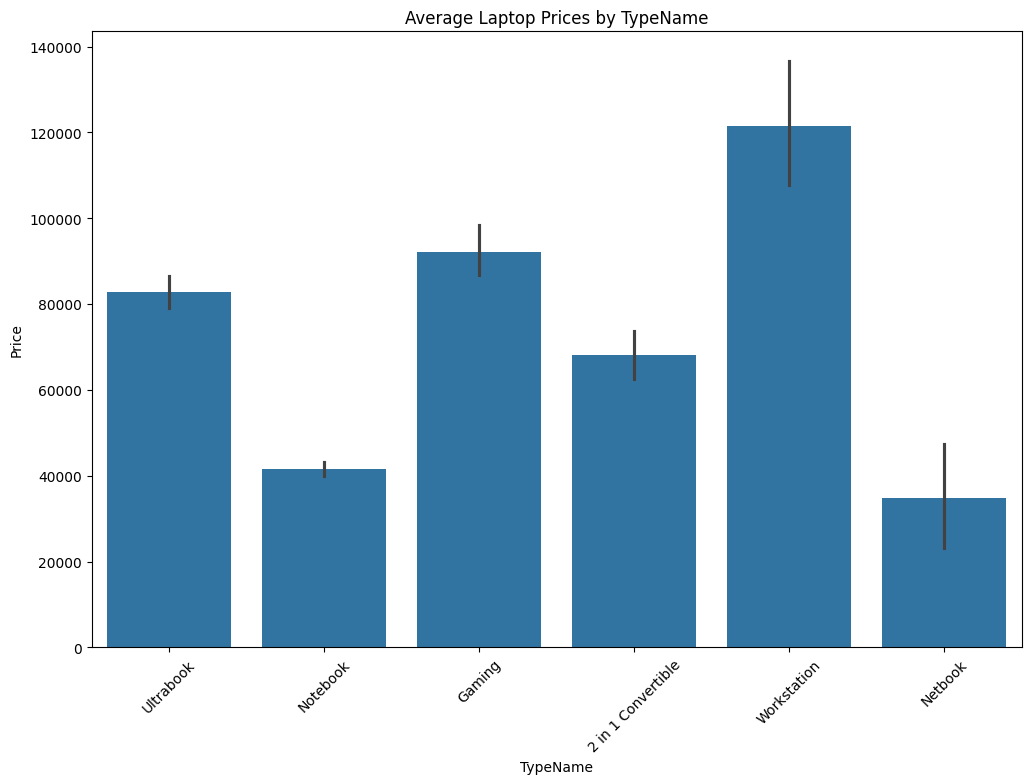

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the average price of laptops within each category
average_price_by_company = df.groupby('Company')['Price'].mean().reset_index()
average_price_by_ram = df.groupby('Ram')['Price'].mean().reset_index()
average_price_by_inches = df.groupby('Inches')['Price'].mean().reset_index()
average_price_by_inches = df.groupby('TypeName')['Price'].mean().reset_index()

# Plot bar plots
plt.figure(figsize=(12, 8))
sns.barplot(x='Company', y='Price', data=df, estimator=lambda x: sum(x) / len(x))
plt.title('Average Laptop Prices by Company')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Ram', y='Price', data=df, estimator=lambda x: sum(x) / len(x))
plt.title('Average Laptop Prices by RAM')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Inches', y='Price', data=df, estimator=lambda x: sum(x) / len(x))
plt.title('Average Laptop Prices by Screen Size')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='TypeName', y='Price', data=df, estimator=lambda x: sum(x) / len(x))
plt.title('Average Laptop Prices by TypeName')
plt.xticks(rotation=45)
plt.show()


# Checking null values

In [44]:
df.isnull().sum()

,0
Company,30
TypeName,30
Inches,31
ScreenResolution,30
Cpu,30
Ram,30
Memory,31
Gpu,30
OpSys,30
Weight,31


# Dropped null values and checking after imputation

In [45]:
df.dropna(inplace=True)
print(df.isnull().sum())

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


# **Step 3: Data Preprocessing**

# Feature Engineering

In [53]:
import pandas as pd
import numpy as np


# Define the function to extract CPU series
def extract_series(cpu):
    if pd.isna(cpu):
        return 'Unknown'
    if 'Intel Core i3' in cpu:
        return 'Intel Core i3'
    elif 'Intel Core i5' in cpu:
        return 'Intel Core i5'
    elif 'Intel Core i7' in cpu:
        return 'Intel Core i7'
    elif 'Intel Core M' in cpu:
        return 'Intel Core M'
    elif 'Intel Atom' in cpu:
        return 'Intel Atom'
    elif 'Intel Pentium' in cpu:
        return 'Intel Pentium'
    elif 'Intel Celeron' in cpu:
        return 'Intel Celeron'
    elif 'Intel Xeon' in cpu:
        return 'Intel Xeon'
    elif 'AMD E-Series' in cpu:
        return 'AMD E-Series'
    elif 'AMD A6-Series' in cpu:
        return 'AMD A6-Series'
    elif 'AMD A9-Series' in cpu:
        return 'AMD A9-Series'
    elif 'AMD A10-Series' in cpu:
        return 'AMD A10-Series'
    elif 'AMD A12-Series' in cpu:
        return 'AMD A12-Series'
    elif 'AMD FX' in cpu:
        return 'AMD FX'
    elif 'AMD Ryzen' in cpu:
        return 'AMD Ryzen'
    else:
        return 'Other'

# Apply the function to the 'Cpu' column and create a new column 'Cpu_Series'
df['Cpu_Series'] = df['Cpu'].apply(extract_series)

Explaination of above code:-

* Function Definition – extract_series(cpu):

  * Takes a CPU name string and returns a simplified CPU series name (e.g., "Intel Core i5", "AMD Ryzen").

  * Handles various Intel and AMD CPU types.

  * Returns "Unknown" if the value is missing, and "Other" for unrecognized CPU types.

* Apply Function to DataFrame:

  * Applies the function to the 'Cpu' column.

  * Stores the extracted CPU series into a new column 'Cpu_Series'

In [46]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 'Touchscreen' if 'Touchscreen' in x else 'NonTouchscreen')
df['Touchscreen'].value_counts()

,count
Touchscreen,
NonTouchscreen,1085
Touchscreen,185


In [47]:
import pandas as pd

def categorize_os(os_name):
    if 'Windows 10' in os_name or 'Windows 7' in os_name or 'Windows 10 S' in os_name:
        return 'Windows'
    elif 'No OS' in os_name:
        return 'No OS'
    elif 'Mac OS X' in os_name or 'macOS' in os_name:
        return 'macOS'
    elif 'Linux' in os_name or 'Chrome OS' in os_name or 'Android' in os_name:
        return 'other/Linux'
    else:
        return 'Unknown'

# Assuming 'df' is your DataFrame and 'OS' is the column containing the OS names
df['OS'] = df['OpSys'].apply(categorize_os)

# Verify the result
print(df[['OpSys', 'OS']].head())
print(df['OS'].value_counts())

   OpSys     OS
0  macOS  macOS
1  macOS  macOS
2  No OS  No OS
3  macOS  macOS
4  macOS  macOS
OS
Windows        1097
other/Linux      89
No OS            63
macOS            21
Name: count, dtype: int64


In [48]:
def categorize_gpu(gpu_name):
    if 'Intel' in gpu_name:
        return 'Intel'
    elif 'AMD' in gpu_name:
        return 'AMD'
    elif 'Nvidia' in gpu_name or 'NVIDIA' in gpu_name:
        return 'Nvidia'
    elif 'ARM Mali' in gpu_name:
        return 'ARM Mali'
    else:
        return 'other'

# Apply the function to the 'Gpu' column and create a new column 'GpuCategory'
df['GpuCategory'] = df['Gpu'].apply(categorize_gpu)

# Verify the result
print(df[['Gpu', 'GpuCategory']].head())
print(df['GpuCategory'].value_counts())

                            Gpu GpuCategory
0  Intel Iris Plus Graphics 640       Intel
1        Intel HD Graphics 6000       Intel
2         Intel HD Graphics 620       Intel
3            AMD Radeon Pro 455         AMD
4  Intel Iris Plus Graphics 650       Intel
GpuCategory
Intel       702
Nvidia      392
AMD         175
ARM Mali      1
Name: count, dtype: int64


In [50]:
import re                 # Used to match specific patterns like "256GB SSD" or "1TB HDD" from text strings

# Function to extract SSD and HDD storage from memory string
def extract_storage(memory):
    ssd = 0
    hdd = 0
    flash_storage = 0
    hybrid = 0
    ssd_match = re.findall(r'(\d+(?:\.\d+)?)(?=GB SSD|TB SSD)', memory)
    hdd_match = re.findall(r'(\d+(?:\.\d+)?)(?=GB HDD|TB HDD)', memory)
    flash_storage_match = re.findall(r'(\d+(?:\.\d+)?)(?=GB Flash Storage|TB Flash Storage)', memory)
    hybrid_match = re.findall(r'(\d+(?:\.\d+)?)(?=GB Hybrid|TB Hybrid)', memory)

    if ssd_match:
        ssd = sum(int(float(x.replace('TB', '1024').replace('GB', ''))) for x in ssd_match)

    if hdd_match:
        hdd = sum(int(float(x.replace('TB', '1024').replace('GB', ''))) for x in hdd_match)

    if flash_storage_match:
        flash_storage = sum(int(float(x.replace('TB', '1024').replace('GB', ''))) for x in flash_storage_match)

    if hybrid_match:
        hybrid = sum(int(float(x.replace('TB', '1024').replace('GB', ''))) for x in hybrid_match)

    return pd.Series([ssd, hdd,flash_storage,hybrid])

# Apply the function to the DataFrame and create new columns
df[['SSD', 'HDD','Flash Storage','Hybrid']] = df['Memory'].apply(extract_storage)

# Print the result
print(df[['Memory', 'SSD', 'HDD','Flash Storage','Hybrid']].value_counts())

Memory                         SSD   HDD  Flash Storage  Hybrid
256GB SSD                      256   0    0              0         399
1TB HDD                        0     1    0              0         217
500GB HDD                      0     500  0              0         130
512GB SSD                      512   0    0              0         116
128GB SSD +  1TB HDD           128   1    0              0          92
128GB SSD                      128   0    0              0          74
256GB SSD +  1TB HDD           256   1    0              0          71
32GB Flash Storage             0     0    32             0          37
2TB HDD                        0     2    0              0          16
64GB Flash Storage             0     0    64             0          14
512GB SSD +  1TB HDD           512   1    0              0          14
1TB SSD                        1     0    0              0          13
256GB SSD +  2TB HDD           256   2    0              0          10
1.0TB Hybrid 

Explaination :-

* Function extract_storage(memory):

  * Initializes storage counters for SSD, HDD, Flash Storage, and Hybrid as 0.

  * Uses re.findall() to locate number values preceding the storage types:

  * Matches both GB and TB, and extracts just the numeric part.

  * Converts "TB" to "1024" (since 1TB = 1024GB) and adds total storage for each type.

* Apply to DataFrame:

  *  Applies the extract_storage function to each row of the 'Memory' column.

  * Expands the returned series into four new columns.

* Display Count of Each Combination:
  * Prints the frequency of each unique combination of storage configuration.

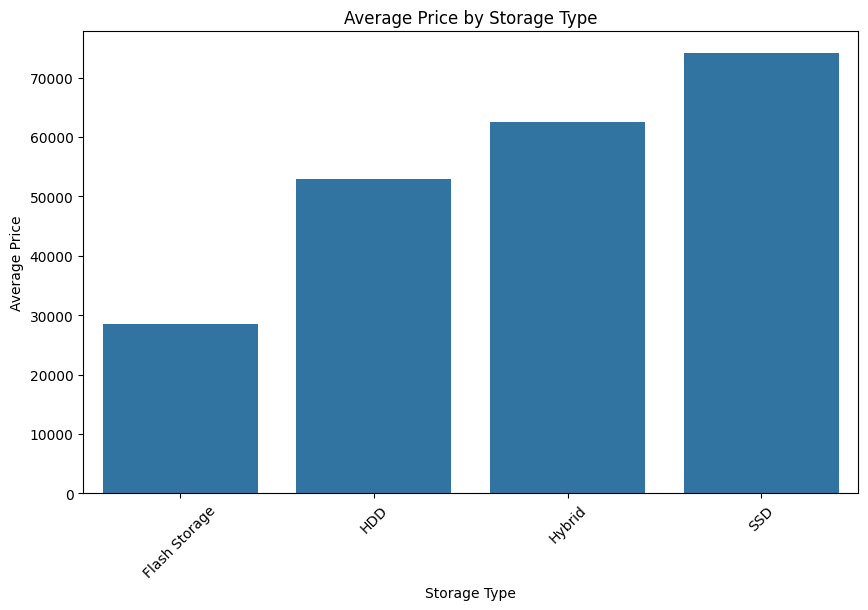

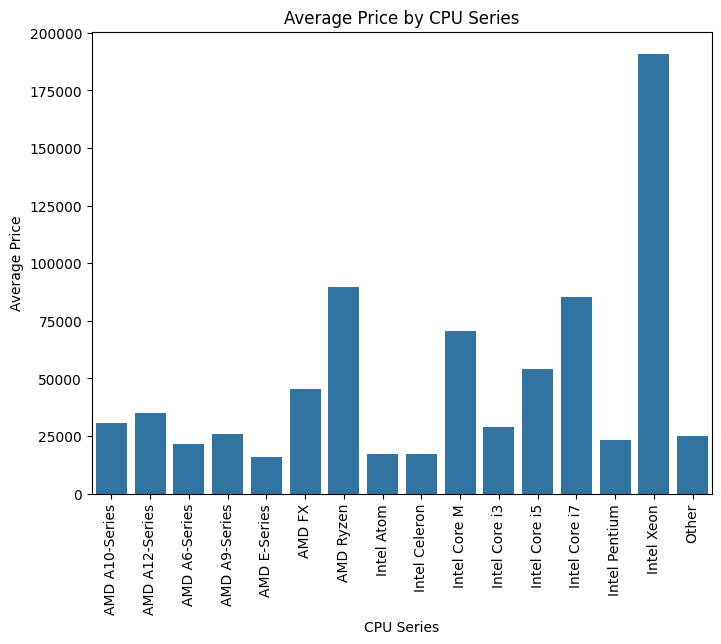

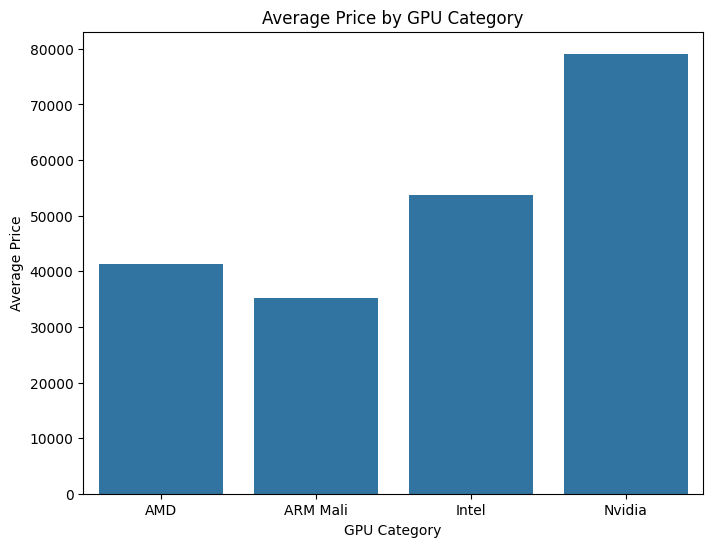

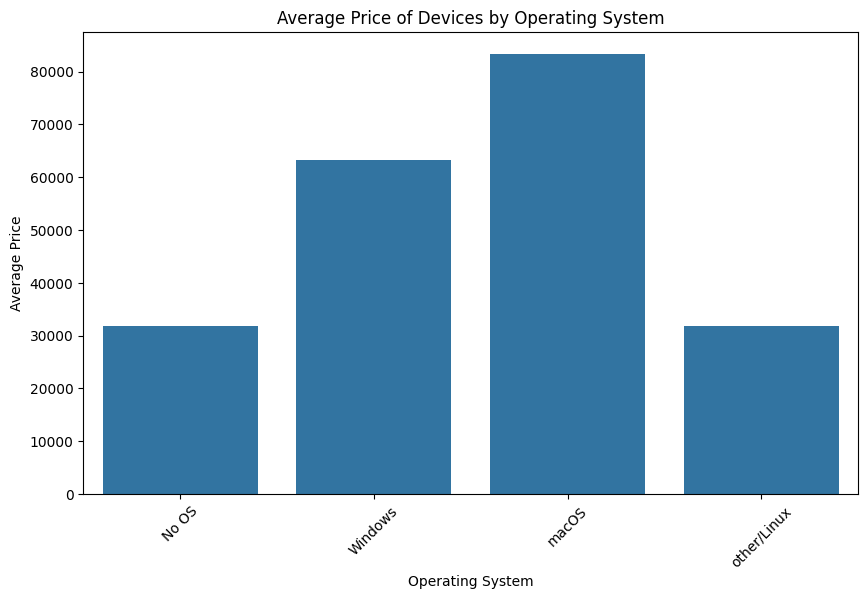

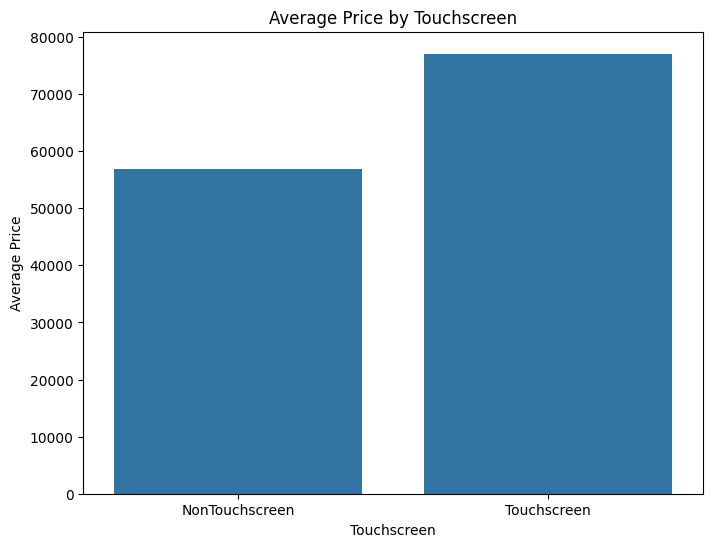

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_price_cpu_series = df.groupby('Cpu_Series')['Price'].mean().reset_index()
avg_price_gpu_category = df.groupby('GpuCategory')['Price'].mean().reset_index()
avg_price_OS = df.groupby('OS')['Price'].mean().reset_index()
avg_price_touchscreen = df.groupby('Touchscreen')['Price'].mean().reset_index()

# Melt the DataFrame to have 'StorageType' and 'Price' columns
melted_df = df.melt(id_vars='Price', value_vars=['SSD', 'HDD', 'Flash Storage', 'Hybrid'], var_name='StorageType', value_name='Count')
melted_df = melted_df[melted_df['Count'] > 0]  # Filter out rows with count 0

# Group by 'StorageType' and calculate the mean price
avg_prices_storage_types = melted_df.groupby('StorageType')['Price'].mean().reset_index()

# Plot the average price for each storage type
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_prices_storage_types, x='StorageType', y='Price')
plt.title('Average Price by Storage Type')
plt.xlabel('Storage Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

# Plot average price by CPU Series
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_price_cpu_series, x='Cpu_Series', y='Price')
plt.title('Average Price by CPU Series')
plt.xlabel('CPU Series')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

# Plot average price by GPU Category
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_price_gpu_category, x='GpuCategory', y='Price')
plt.title('Average Price by GPU Category')
plt.xlabel('GPU Category')
plt.ylabel('Average Price')
plt.show()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='OS', y='Price', data=avg_price_OS)
plt.title('Average Price of Devices by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


#Plot average price by Touchscreen
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_price_touchscreen, x='Touchscreen', y='Price')
plt.title('Average Price by Touchscreen')
plt.xlabel('Touchscreen')
plt.ylabel('Average Price')
plt.show()

In [55]:
# Function to extract X and Y resolutions and panel type using regular expressions
def extract_resolution(resolution):
    match = re.match(r'(?:(?P<panel_type>.*?)(?:\sPanel)?\s?(?:\/)?\s?(?:Touchscreen)?\s?)(?P<x_res>\d+)x(?P<y_res>\d+)', resolution)
    if match:
        panel_type = match.group('panel_type') or 'Unknown'
        if panel_type == "IPS":
            panel_type = "IPS Panel"
        x_res = int(match.group('x_res'))
        y_res = int(match.group('y_res'))
        return pd.Series([panel_type, x_res, y_res])
    else:
        return pd.Series(['Unknown', 0, 0])

# Apply the function to the 'ScreenResolution' column and create new columns 'PanelType', 'X_res', and 'Y_res'
df[['PanelType', 'X_res', 'Y_res']] = df['ScreenResolution'].apply(extract_resolution)

# Function to modify the PanelType column
def modify_panel_type(panel_type):
    panel_type = re.sub(r'(?i)(?:\/|\\|Touchscreen)', '', panel_type)  # Remove "/", "\", and "Touchscreen"
    if panel_type.startswith("IPS Panel"):
        panel_type = "IPS Panel"
    panel_type = re.sub(r'^\s+|\s+$', '', panel_type)  # Strip leading and trailing whitespaces
    return panel_type

# Apply the modification to the PanelType column
df['PanelType'] = df['PanelType'].apply(modify_panel_type)

# Print the result
print(df[['ScreenResolution', 'PanelType', 'X_res', 'Y_res']])

                                ScreenResolution  PanelType  X_res  Y_res
0             IPS Panel Retina Display 2560x1600  IPS Panel   2560   1600
1                                       1440x900    Unknown   1440    900
2                              Full HD 1920x1080    Full HD   1920   1080
3             IPS Panel Retina Display 2880x1800  IPS Panel   2880   1800
4             IPS Panel Retina Display 2560x1600  IPS Panel   2560   1600
...                                          ...        ...    ...    ...
1298   IPS Panel Full HD / Touchscreen 1920x1080  IPS Panel   1920   1080
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800  IPS Panel   3200   1800
1300                                    1366x768    Unknown   1366    768
1301                                    1366x768    Unknown   1366    768
1302                                    1366x768    Unknown   1366    768

[1270 rows x 4 columns]


 Explanation:
* Function extract_resolution(resolution):

  * Uses regular expressions to extract:

    *  Panel type (e.g., IPS, OLED)

    * Horizontal (x_res) and vertical (y_res) resolution

  * Returns "Unknown", 0, 0 if format doesn't match.

  * Adjusts "IPS" to "IPS Panel" for clarity.

* Apply the function:


   *  df[['PanelType', 'X_res', 'Y_res']] = df['ScreenResolution'].apply (extract_resolution)
   *  Adds three new columns: PanelType, X_res, and Y_res.

* Function modify_panel_type(panel_type):

  * Cleans panel type by:

  * Removing /, \, and "Touchscreen" mentions.

  *  Stripping extra spaces.

  * Standardizing IPS-related values.

* Apply cleanup function:


* Print final result

# Label Encoding

In [56]:
from sklearn.preprocessing import LabelEncoder

# The LabelEncoder from sklearn.preprocessing is used to convert categorical text data into numerical values


columns_to_encode = ['Company','TypeName','OS','Cpu_Series','GpuCategory','PanelType']

# Dictionary to store label encoders
label_encoders = {}

# Label encode each column in the list
for col in columns_to_encode:
 le = LabelEncoder()
 df[col] = le.fit_transform(df[col])
 label_encoders[col] = le

In [57]:
# To print the mapping for each column
for col, le in label_encoders.items():
    print(f"Mapping for {col}:")
    for class_index, class_label in enumerate(le.classes_):
        print(f"  {class_label}: {class_index}")

Mapping for Company:
  Acer: 0
  Apple: 1
  Asus: 2
  Chuwi: 3
  Dell: 4
  Fujitsu: 5
  Google: 6
  HP: 7
  Huawei: 8
  LG: 9
  Lenovo: 10
  MSI: 11
  Mediacom: 12
  Microsoft: 13
  Razer: 14
  Samsung: 15
  Toshiba: 16
  Vero: 17
  Xiaomi: 18
Mapping for TypeName:
  2 in 1 Convertible: 0
  Gaming: 1
  Netbook: 2
  Notebook: 3
  Ultrabook: 4
  Workstation: 5
Mapping for OS:
  No OS: 0
  Windows: 1
  macOS: 2
  other/Linux: 3
Mapping for Cpu_Series:
  AMD A10-Series: 0
  AMD A12-Series: 1
  AMD A6-Series: 2
  AMD A9-Series: 3
  AMD E-Series: 4
  AMD FX: 5
  AMD Ryzen: 6
  Intel Atom: 7
  Intel Celeron: 8
  Intel Core M: 9
  Intel Core i3: 10
  Intel Core i5: 11
  Intel Core i7: 12
  Intel Pentium: 13
  Intel Xeon: 14
  Other: 15
Mapping for GpuCategory:
  AMD: 0
  ARM Mali: 1
  Intel: 2
  Nvidia: 3
Mapping for PanelType:
  4K Ultra HD: 0
  Full HD: 1
  IPS Panel: 2
  Quad HD+: 3
  Unknown: 4


In [58]:
# Convert 'Weight' column to string type
df['Weight'] = df['Weight'].astype(str)
df['Ram'] = df['Ram'].astype(str)

# Extract only numeric values from 'Weight' column
df['Weight'] = df['Weight'].str.extract(r'([\d.]+)').astype(float)
df['Ram'] = df['Ram'].str.extract(r'(\d+)').astype(float)
df

# This line cleans and converts the 'Weight' column from a text format (e.g., "2.2kg") to a numeric float (e.g., 2.2) and same for Ram.
# r'([\d.]+)' matches any number (including decimals)


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,OS,GpuCategory,SSD,HDD,Flash Storage,Hybrid,Cpu_Series,PanelType,X_res,Y_res
0,1,4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,2,2,128,0,0,0,11,2,2560,1600
1,1,4,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,2,2,0,0,128,0,11,4,1440,900
2,7,3,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,...,0,2,256,0,0,0,11,1,1920,1080
3,1,4,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,...,2,0,512,0,0,0,12,2,2880,1800
4,1,4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,2,2,256,0,0,0,11,2,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,...,1,2,128,0,0,0,12,2,1920,1080
1299,10,0,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16.0,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,...,1,2,512,0,0,0,12,2,3200,1800
1300,10,3,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,...,1,2,0,0,64,0,8,4,1366,768
1301,7,3,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,...,1,0,0,1,0,0,12,4,1366,768


In [59]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'Touchscreen', 'OS',
       'GpuCategory', 'SSD', 'HDD', 'Flash Storage', 'Hybrid', 'Cpu_Series',
       'PanelType', 'X_res', 'Y_res'],
      dtype='object')

# **Step 4: Modelling**

# Selecting features and target variable

In [22]:
x=df[['Company','TypeName','Ram','Inches','OS','Cpu_Series','GpuCategory','SSD','HDD','Flash Storage','Hybrid','PanelType','X_res','Y_res']]
x

,Company,TypeName,Ram,Inches,OS,Cpu_Series,GpuCategory,SSD,HDD,Flash Storage,Hybrid,PanelType,X_res,Y_res
0,1,4,8.0,13.3,2,11,2,128,0,0,0,2,2560,1600
1,1,4,8.0,13.3,2,11,2,0,0,128,0,4,1440,900
2,7,3,8.0,15.6,0,11,2,256,0,0,0,1,1920,1080
3,1,4,16.0,15.4,2,12,0,512,0,0,0,2,2880,1800
4,1,4,8.0,13.3,2,11,2,256,0,0,0,2,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0,4.0,14,1,12,2,128,0,0,0,2,1920,1080
1299,10,0,16.0,13.3,1,12,2,512,0,0,0,2,3200,1800
1300,10,3,2.0,14,1,8,2,0,0,64,0,4,1366,768
1301,7,3,6.0,15.6,1,12,0,0,1,0,0,4,1366,768


In [60]:
y = df[['Price']]
y

,Price
0,71378.6832
1,47895.5232
2,30636.0000
3,135195.3360
4,96095.8080
...,...
1298,33992.6400
1299,79866.7200
1300,12201.1200
1301,40705.9200


# Splitting the data into training and testing sets

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.2, random_state = 42)
print("train", x_train.shape)
print("test", x_test.shape)

train (1016, 14)
test (254, 14)


In [63]:
from sklearn.preprocessing import StandardScaler        # Used to normalize numerical features

# Feature scaling
scaler = StandardScaler()                               # Creates a scaler object to fit and transform the data
x_train_scaled = scaler.fit_transform(x_train)          # Computes the mean and standard deviation from x_train, then scales it
x_test_scaled = scaler.transform(x_test)                # Applies the same scaling (from training data) to the test data to prevent data leakage

Explaination of above code :- To ensure that all features contribute equally to the model by putting them on a similar scale, which improves the performance of many machine learning algorithms like linear regression, SVMs, and KNN.

In [64]:
x_train['Inches'] = pd.to_numeric(x_train['Inches'], errors='coerce')
x_test['Inches'] = pd.to_numeric(x_test['Inches'], errors='coerce')

In [65]:
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [66]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(random_state=42),
    'XGBoost Regressor': xgb.XGBRegressor(random_state=42)
}

In [67]:
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {'R_2 Score': r2, 'Mean Squared Error': mse , 'Predictions': y_pred}

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [68]:
# Printing results
for name, metrics in results.items():
    print(f"\nModel: {name}")
    print(f"R-squared: {metrics['R_2 Score']}")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']}\n")


Model: Linear Regression
R-squared: 0.603119393717851
Mean Squared Error: 441294498.7310094


Model: Random Forest Regression
R-squared: 0.8305945413470092
Mean Squared Error: 188363189.77355582


Model: Gradient Boosting Regressor
R-squared: 0.8143365425109613
Mean Squared Error: 206440579.6312566


Model: XGBoost Regressor
R-squared: 0.7931564450263977
Mean Squared Error: 229990880.0



# **Step 5: Evaluation**

# *Best Prediction model*

In [69]:
best_model = max(results.items(), key=lambda x: x[1]['R_2 Score'])[0]
print(f"The best model is: {best_model}")

The best model is: Random Forest Regression
